In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("kddcup_corrected_subset.csv", index_col=None)

In [5]:
df.head(5)

,duration,"""protocol_type""","""flag""","""src_bytes""","""dst_bytes""","""land""","""wrong_fragment""","""urgent""",hot,"""num_failed_logins""",...,"""dst_host_srv_count""","""dst_host_same_srv_rate""","""dst_host_diff_srv_rate""","""dst_host_same_src_port_rate""","""dst_host_srv_diff_host_rate""",dst_host_serror_rate,"""dst_host_srv_serror_rate""","""dst_host_rerror_rate""","""dst_host_srv_rerror_rate""",label
0,0,tcp,SF,223,185,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,normal
1,0,tcp,SF,230,260,0,0,0,0,0,...,255,1,0,33,7,33,0,0,0,normal
2,0,tcp,SF,297,13787,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,normal
3,0,tcp,SF,291,3542,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,normal
4,0,tcp,SF,295,753,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,normal


In [6]:
y = df["label"].values
from collections import Counter
Counter(y)

Counter({'normal': 39247,
         'apache2': 794,
         'phf': 2,
         'back': 1098,
         'neptune': 93,
         'portsweep': 2,
         'saint': 1})

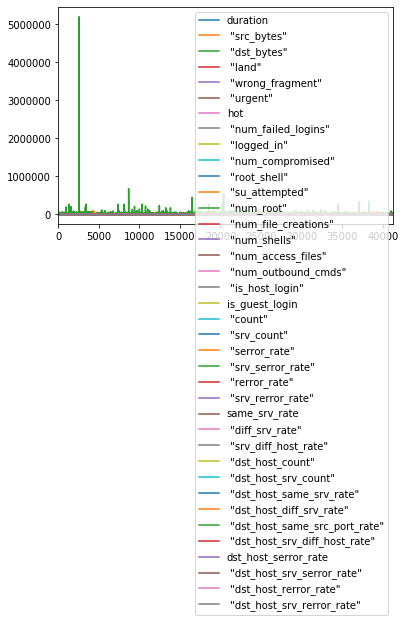

In [7]:
df.plot()

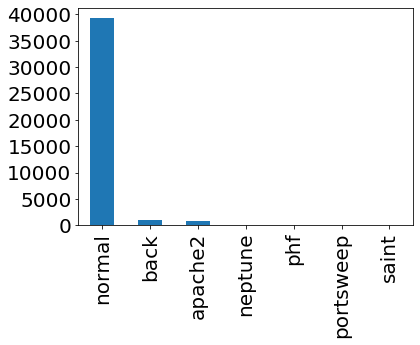

In [8]:
train_class=pd.value_counts(df["label"])
train_class.plot(kind='bar', fontsize=20)

In [9]:
from sklearn.preprocessing import LabelEncoder
encodings = dict()
for c in df.columns:
    if df[c].dtype == "object":
        encodings[c] = LabelEncoder()
        df[c] = encodings[c].fit_transform(df[c])

In [10]:
from sklearn.preprocessing import StandardScaler

durations = df['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

count    4.123700e+04
mean     6.574147e-15
std      1.000012e+00
min     -1.059662e-01
25%     -1.059662e-01
50%     -1.059662e-01
75%     -1.059662e-01
max      1.407367e+01
dtype: float64

In [11]:
y = df.pop("label").values
X = df.values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [15]:
pred = knn.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(confusion_matrix(y_test,pred))

[[  244     0     0     2     0]
 [    2   345     0     0     0]
 [    0     0    25     2     0]
 [    1     0     2 11748     0]
 [    0     0     0     1     0]]


In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       246
           1       1.00      0.99      1.00       347
           2       0.93      0.93      0.93        27
           3       1.00      1.00      1.00     11751
           5       0.00      0.00      0.00         1

    accuracy                           1.00     12372
   macro avg       0.78      0.78      0.78     12372
weighted avg       1.00      1.00      1.00     12372



C:\Users\vikram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

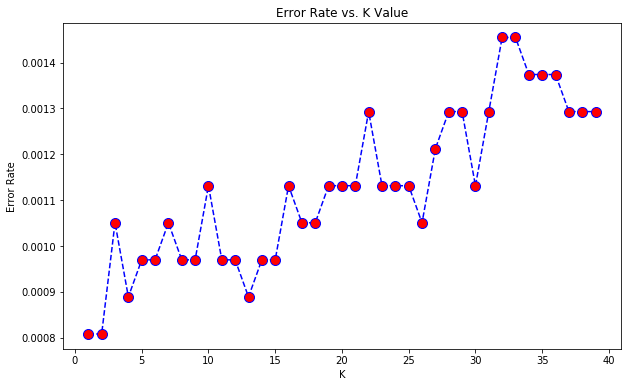

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:
#choosing k=17 and 15
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[  239     2     0     5     0]
 [    0   347     0     0     0]
 [    0     0    23     4     0]
 [    1     0     0 11750     0]
 [    0     0     0     1     0]]


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       246
           1       0.99      1.00      1.00       347
           2       1.00      0.85      0.92        27
           3       1.00      1.00      1.00     11751
           5       0.00      0.00      0.00         1

    accuracy                           1.00     12372
   macro avg       0.80      0.76      0.78     12372
weighted avg       1.00      1.00      1.00     12372



C:\Users\vikram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
